# ANN for FASHION MNIST DATASET 

This dataset consists of a training set of 60,000 examples and a test set of 10,000 examples of different apparels with labels from 10 classes, denoting the type of apparel. We here use an ANN architecture to train and test our model, which finally gives an accuracy of 88.81%

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Using tensorflow for this architecture

In [2]:
import tensorflow as tf
from tensorflow import keras

Downloading the Fashion Mnist dataset from Keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_entire, Y_train_entire),(X_test, Y_test)=fashion_mnist.load_data()

Check the data available in the dataset

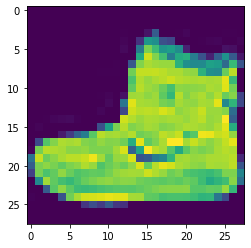

In [4]:
plt.imshow(X_train_entire[0])

In [5]:
Y_train_entire[0]

9

Standardizing the dataset to fluctuate between 0 and 1, where 0 denotes black and 1 denotes white

In [6]:
X_train_entire=X_train_entire/255.
X_test=X_test/255.

Split the Training dataset to Train set and Validation set. Using 5000 data for Validation while the rest for Training

In [7]:
X_valid, X_train=X_train_entire[:5000],X_train_entire[5000:]
Y_valid, Y_train=Y_train_entire[:5000],Y_train_entire[5000:]

In [8]:
X_valid.shape


(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

Neural Network architecture with 2 hidden layers with 300 and 100 neurons respectively

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


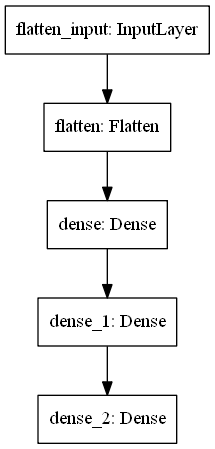

In [13]:
import pydot
keras.utils.plot_model(model)

Define a checkpoint where best parameters from epoch gets saved, to avoid overfitting due to multiple Epochs. 

By using early stopping, we can stop our model from training if Validation error stops decreasing for 10 consecutive epochs.

Used Sparse Categorical Cross Entropy as it is a multi class classification

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Fashion_MNIST.h5", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [15]:
model_history=model.fit(X_train, Y_train, epochs=300, validation_data=(X_valid, Y_valid), 
                        callbacks=[checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/300
55000/55000 [==============================] - 7s 128us/sample - loss: 0.7194 - accuracy: 0.7651 - val_loss: 0.5038 - val_accuracy: 0.8290
Epoch 2/300
55000/55000 [==============================] - 7s 123us/sample - loss: 0.4886 - accuracy: 0.8302 - val_loss: 0.4482 - val_accuracy: 0.8422
Epoch 3/300
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4441 - accuracy: 0.8427 - val_loss: 0.4191 - val_accuracy: 0.8562
Epoch 4/300
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4169 - accuracy: 0.8540 - val_loss: 0.3933 - val_accuracy: 0.8652
Epoch 5/300
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3966 - accuracy: 0.8599 - val_loss: 0.4376 - val_accuracy: 0.8378
Epoch 6/300
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3802 - accuracy: 0.8661 - val_loss: 0.3854 - val_accuracy: 0.8686
Epoch 7/300
55000/55000 [====================

Use the best model from training set, and plot graph to see how loss has been constantly reducing

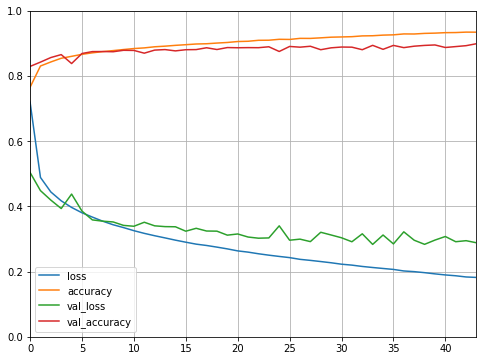

In [16]:
model=keras.models.load_model("Best_Fashion_MNIST.h5")
pd.DataFrame(model_history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.3222 - accuracy: 0.8850


[0.3222223682999611, 0.885]

In [18]:
model.save("FashionMNIST.h5")